## Reconstructing hits from SiPM data with multiple files

In this code we are reconstructing data collected from from different collimated points of the source. This data is collected from four SiPMs with an oscilloscope. The idea is to reconstruck the center of mass of each signal sweep to find out the coordinates on the detectore where did the particle hit. Wanted output is a coordinate grid of the detector where we can see each hit. This can be then compared with the data gathered from the GEMs with VMMs.

- The size of the detector is 10x10cm.
- We are using the differential center-of-mass method (using General Centroid Formula) to get the X and Y coordinates for each sweep.

In [12]:
import lecroyscope
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
run = 48

channel_files = {
    'C1': [f"C:/Users/gdd.CERN/Desktop/SiPM_Reconstruction/Data/sipm_bottom_data/run{run}/C1--Trace--{i:05d}.trc" for i in range(5)],
    'C2': [f"C:/Users/gdd.CERN/Desktop/SiPM_Reconstruction/Data/sipm_bottom_data/run{run}/C1--Trace--{i:05d}.trc" for i in range(5)],
    'C3': [f"C:/Users/gdd.CERN/Desktop/SiPM_Reconstruction/Data/sipm_bottom_data/run{run}/C1--Trace--{i:05d}.trc" for i in range(5)],
    'C4': [f"C:/Users/gdd.CERN/Desktop/SiPM_Reconstruction/Data/sipm_bottom_data/run{run}/C1--Trace--{i:05d}.trc" for i in range(5)]
}

channel_map = {
    'C1': 'SiPM_Left',
    'C2': 'SiPM_Right',
    'C3': 'SiPM_Top',
    'C4': 'SiPM_Bottom'
}

sipm_positions = {
    'SiPM_Top':    (-1, 1),
    'SiPM_Bottom': (1, -1),
    'SiPM_Left':   (-1, -1),
    'SiPM_Right':  (1, 1)
}

K_X = 1.0 # Scaling factor for differential CoM (needed for the formula)
K_Y = 1.0

In [14]:
trace_data = []
decoded_events = []

for ch_name, file_list in channel_files.items():
    for file_path in file_list:  
        print(f"Loaded {ch_name} from {file_path}")
        
        trace = lecroyscope.Trace(file_path)
        trace_length =  len(trace)
        #print(trace_length)
        #print(len(trace))
        
        # Create rows for each value in the trace
        for i in range(trace_length):
            trace_data.append({
                "channel": ch_name,
                "file_path": file_path,
                "y_values": trace.voltage[i, :], # <--voltage 
                "x_values": trace.time, # <-- time 
            })

df_traces = pd.DataFrame(trace_data)

Loaded C1 from C:/Users/gdd.CERN/Desktop/SiPM_Reconstruction/Data/sipm_bottom_data/run48/C1--Trace--00000.trc
Loaded C1 from C:/Users/gdd.CERN/Desktop/SiPM_Reconstruction/Data/sipm_bottom_data/run48/C1--Trace--00001.trc
Loaded C1 from C:/Users/gdd.CERN/Desktop/SiPM_Reconstruction/Data/sipm_bottom_data/run48/C1--Trace--00002.trc
Loaded C1 from C:/Users/gdd.CERN/Desktop/SiPM_Reconstruction/Data/sipm_bottom_data/run48/C1--Trace--00003.trc
Loaded C1 from C:/Users/gdd.CERN/Desktop/SiPM_Reconstruction/Data/sipm_bottom_data/run48/C1--Trace--00004.trc
Loaded C2 from C:/Users/gdd.CERN/Desktop/SiPM_Reconstruction/Data/sipm_bottom_data/run48/C1--Trace--00000.trc
Loaded C2 from C:/Users/gdd.CERN/Desktop/SiPM_Reconstruction/Data/sipm_bottom_data/run48/C1--Trace--00001.trc
Loaded C2 from C:/Users/gdd.CERN/Desktop/SiPM_Reconstruction/Data/sipm_bottom_data/run48/C1--Trace--00002.trc
Loaded C2 from C:/Users/gdd.CERN/Desktop/SiPM_Reconstruction/Data/sipm_bottom_data/run48/C1--Trace--00003.trc
Loaded C2 

In [15]:
display(df_traces)
print(len(df_traces))
df_traces.to_csv('osci1_data. csv', index=False)
#df_traces.head(5)
for idx, row in df_traces.iterrows():
    #trace_len = len(row['trace_obj'].y) if row['trace_obj'] is not None else None
    y_len = len(row['y_values']) if row['y_values'] is not None else None
    x_len = len(row['x_values']) if row['x_values'] is not None else None
    print(f"y_values={y_len}, x_values={x_len}")

,channel,file_path,y_values,x_values
0,C1,C:/Users/gdd.CERN/Desktop/SiPM_Reconstruction/...,"[-0.004647472909709904, -0.003998852938821074,...","[-3.000864874470278e-07, -2.9998648744569263e-..."
1,C1,C:/Users/gdd.CERN/Desktop/SiPM_Reconstruction/...,"[-0.005879850854398683, -0.006852780810731929,...","[-3.000864874470278e-07, -2.9998648744569263e-..."
2,C1,C:/Users/gdd.CERN/Desktop/SiPM_Reconstruction/...,"[0.000995520837022923, 0.0012549688253784552, ...","[-3.000864874470278e-07, -2.9998648744569263e-..."
3,C1,C:/Users/gdd.CERN/Desktop/SiPM_Reconstruction/...,"[-0.007955434761242941, -0.00730681479035411, ...","[-3.000864874470278e-07, -2.9998648744569263e-..."
4,C1,C:/Users/gdd.CERN/Desktop/SiPM_Reconstruction/...,"[-0.0100310186680872, -0.01087422463024268, -0...","[-3.000864874470278e-07, -2.9998648744569263e-..."
...,...,...,...,...
19995,C4,C:/Users/gdd.CERN/Desktop/SiPM_Reconstruction/...,"[-0.004517748915532138, -0.004647472909709904,...","[-3.0005927896646235e-07, -2.999592789651272e-..."
19996,C4,C:/Users/gdd.CERN/Desktop/SiPM_Reconstruction/...,"[-0.010355328653531615, -0.013338980519620236,...","[-3.0005927896646235e-07, -2.999592789651272e-..."
19997,C4,C:/Users/gdd.CERN/Desktop/SiPM_Reconstruction/...,"[-0.003415094965021126, -0.0012097870639991015...","[-3.0005927896646235e-07, -2.999592789651272e-..."
19998,C4,C:/Users/gdd.CERN/Desktop/SiPM_Reconstruction/...,"[-0.008020296758331824, -0.011912016583664808,...","[-3.0005927896646235e-07, -2.999592789651272e-..."


20000
y_values=10002, x_values=10002
y_values=10002, x_values=10002
y_values=10002, x_values=10002
y_values=10002, x_values=10002
y_values=10002, x_values=10002
y_values=10002, x_values=10002
y_values=10002, x_values=10002
y_values=10002, x_values=10002
y_values=10002, x_values=10002
y_values=10002, x_values=10002
y_values=10002, x_values=10002
y_values=10002, x_values=10002
y_values=10002, x_values=10002
y_values=10002, x_values=10002
y_values=10002, x_values=10002
y_values=10002, x_values=10002
y_values=10002, x_values=10002
y_values=10002, x_values=10002
y_values=10002, x_values=10002
y_values=10002, x_values=10002
y_values=10002, x_values=10002
y_values=10002, x_values=10002
y_values=10002, x_values=10002
y_values=10002, x_values=10002
y_values=10002, x_values=10002
y_values=10002, x_values=10002
y_values=10002, x_values=10002
y_values=10002, x_values=10002
y_values=10002, x_values=10002
y_values=10002, x_values=10002
y_values=10002, x_values=10002
y_values=10002, x_values=10002
y_

In [ ]:
def process_single_sweep(voltage_waveform, time_waveform, baseline_region_end_time=-0.25e-6, noise_threshold_std_devs=3):

    # Calculate baseline (e.g., average and std dev of points before the pulse)
    v = np.asarray(voltage_waveform)
    t = np.asarray(time_waveform)
    n = len(v)

    # Find peak, then step to pulse bounds, then take baseline outside it
    # Rough robust baseline to locate the peak & set a stepping threshold
    rough_med = np.median(v)
    mad = np.median(np.abs(v - rough_med))
    sigma_r = 1.4826 * mad + 1e-12  # robust σ; +eps avoids zero

    # Peak index and polarity
    peak_idx = int(np.argmax(np.abs(v - rough_med)))
    pos_pulse = (v[peak_idx] >= rough_med)

    # Threshold to decide when we've "returned to baseline" while stepping
    k_low = 4
    low = rough_med + (k_low * sigma_r if pos_pulse else -k_low * sigma_r)

    # Step left until we fall below (above) low threshold
    i = peak_idx
    while i > 0 and ((v[i] >= low) if pos_pulse else (v[i] <= low)):
        i -= 1
    start_idx = i

    # Step right until we fall below (above) low threshold
    i = peak_idx
    while i < n - 1 and ((v[i] >= low) if pos_pulse else (v[i] <= low)):
        i += 1
    end_idx = i

    # Use everything outside the pulse as baseline
    left_excl = max(0, start_idx)
    right_excl = min(n, end_idx + 1)

    baseline_mask = np.ones(n, dtype=bool)
    baseline_mask[left_excl:right_excl] = False
    baseline_indices = np.where(baseline_mask)[0]

    baseline_mean = np.mean(v[baseline_indices])
    baseline_std = np.std(v[baseline_indices])

    # Subtract baseline
    baseline_subtracted_waveform = v - baseline_mean
    signal_for_integration = np.copy(baseline_subtracted_waveform)

    # Apply a noise threshold (only integrate signal significantly above noise)
    threshold = noise_threshold_std_devs * baseline_std
    
    # Only consider values significantly above the noise level (because we want to be sure we get only significant signals not noice)
    signal_for_integration[signal_for_integration < threshold] = 0.0 # Sets all values that are below a certain threshold to zero so thay are not considered

    # Integrate the signal using the time step (so the time between signals)
    time_step = t[1] - t[0]
    integrated_signal = np.sum(signal_for_integration) * time_step
    """
    plt.figure(figsize=(8, 8))
    plt.plot(t, v)
    plt.xlabel("Time")
    plt.ylabel("Signal Waveform")
    plt.title(f"Waveform Event")
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
    plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
    plt.axhline(threshold, color='red', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.show()"""
    
    return max(0.0, integrated_signal) # <-- Only non-negative signals (just to be sure)

## Center of mass:

$x_{\text{com}} = \frac{S_{\text{Left}} \times (-D) + S_{\text{Right}} \times D}{S_{\text{Left}} + S_{\text{Right}}}$

Factor out $ D $:

$x_{\text{com}} = D \times \frac{S_{\text{Right}} \times 1 + S_{\text{Left}} \times (-1)}{S_{\text{Right}} + S_{\text{Left}}} = D \times \frac{S_{\text{Right}} - S_{\text{Left}}}{S_{\text{Right}} + S_{\text{Left}}}$


Where $ K_X = D $, where $ D $ is half the distance between the left and right SiPMs, scaling the result to the physical dimensions of the detector.

Thus we can calculate it for both x and y using formulas:

$$x_{\text{com}} = K_X \times \frac{S_{\text{Right}} - S_{\text{Left}}}{S_{\text{Right}} + S_{\text{Left}}}$$
$$y_{\text{com}} = K_Y \times \frac{S_{\text{Top}} - S_{\text{Bottom}}}{S_{\text{Top}} + S_{\text{Bottom}}}$$

{'C1':                                                y_values  \
0     [-0.004647472909709904, -0.003998852938821074,...   
1     [-0.005879850854398683, -0.006852780810731929,...   
2     [0.000995520837022923, 0.0012549688253784552, ...   
3     [-0.007955434761242941, -0.00730681479035411, ...   
4     [-0.0100310186680872, -0.01087422463024268, -0...   
...                                                 ...   
4995  [-0.004517748915532138, -0.004647472909709904,...   
4996  [-0.010355328653531615, -0.013338980519620236,...   
4997  [-0.003415094965021126, -0.0012097870639991015...   
4998  [-0.008020296758331824, -0.011912016583664808,...   
4999  [-0.011068810621509328, -0.011133672618598212,...   

                                               x_values  
0     [-3.000864874470278e-07, -2.9998648744569263e-...  
1     [-3.000864874470278e-07, -2.9998648744569263e-...  
2     [-3.000864874470278e-07, -2.9998648744569263e-...  
3     [-3.000864874470278e-07, -2.9998648744569263e-

C:\Users\gdd.CERN\AppData\Local\Temp\ipykernel_1636\1077025955.py:68: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Figure size 800x800 with 0 Axes>

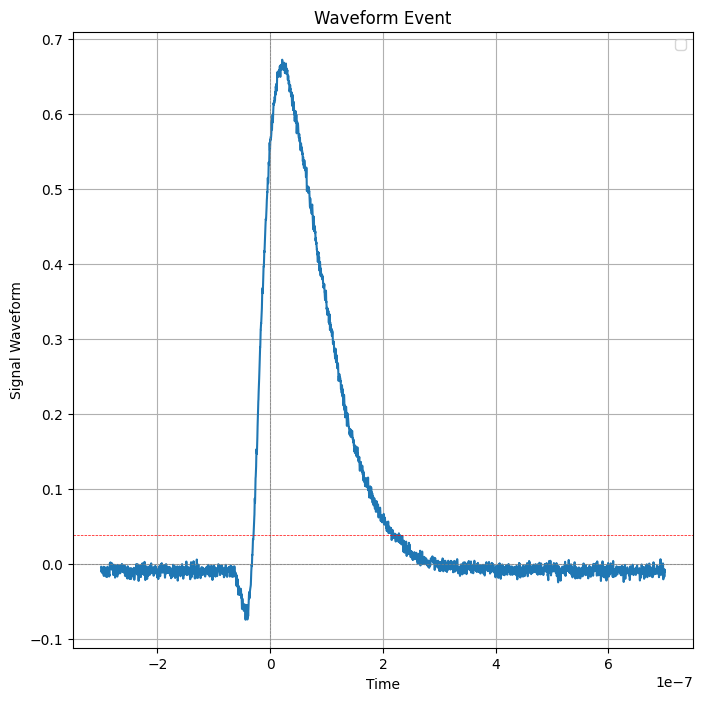

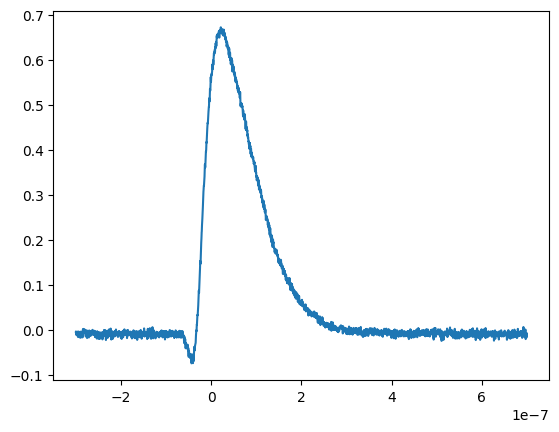

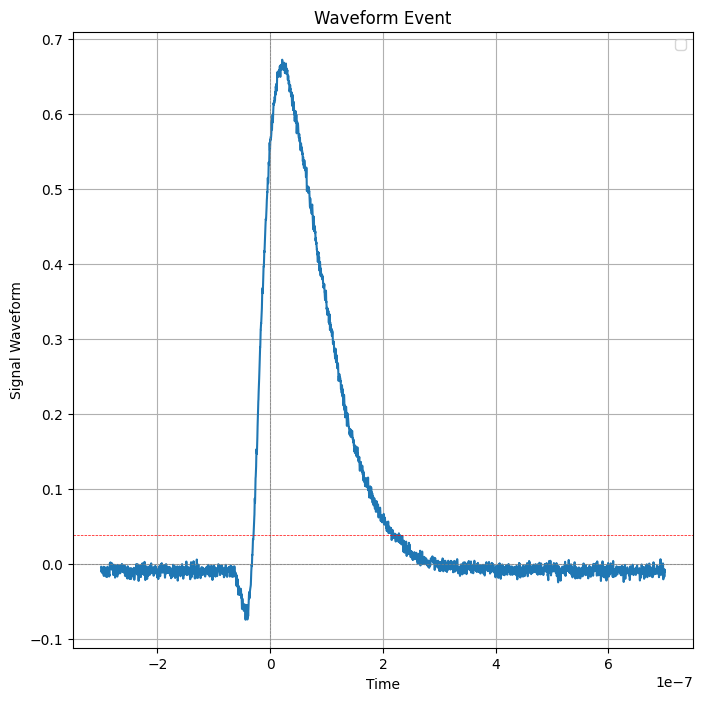

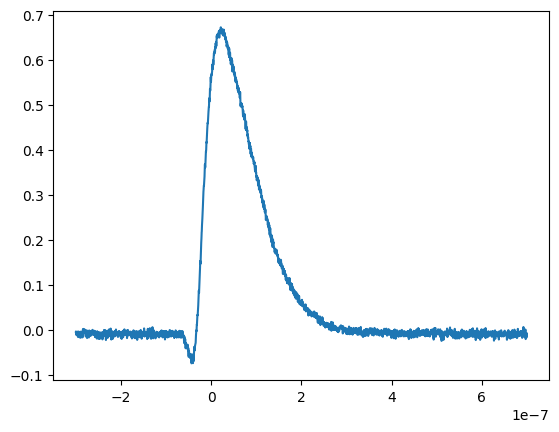

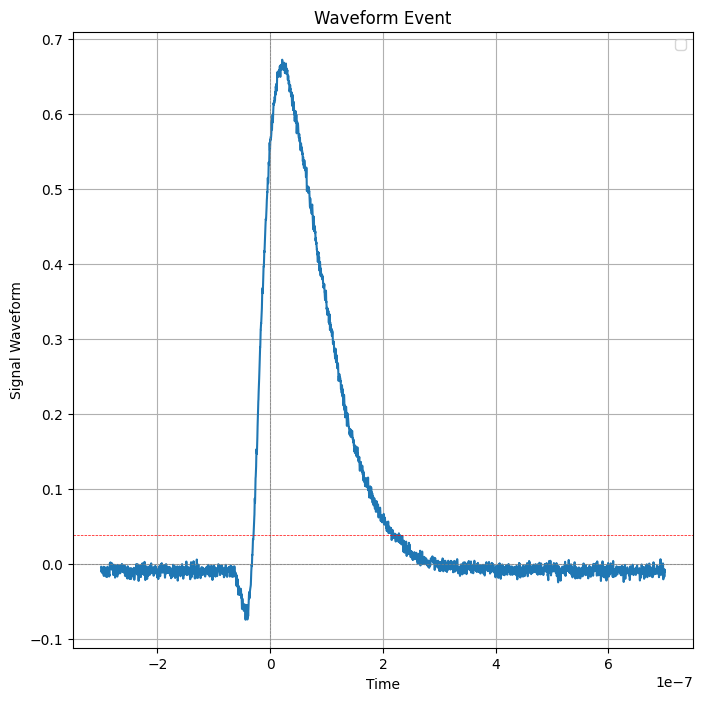

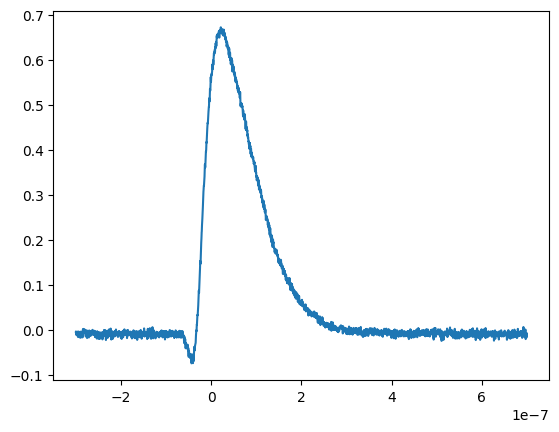

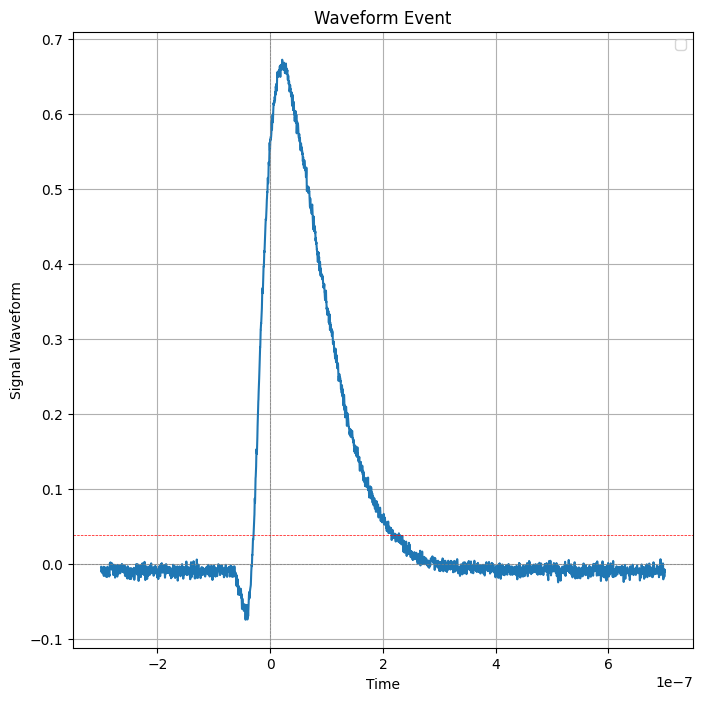

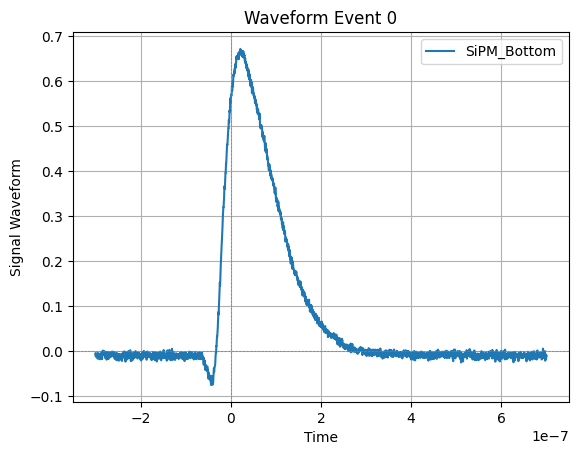

Event 0: S_Top: 8.474e-08, S_Bottom: 8.474e-08, S_Left: 8.474e-08, S_Right: 8.474e-08 -> X_CoM: 0.0, Y_CoM: 0.0


<Figure size 800x800 with 0 Axes>

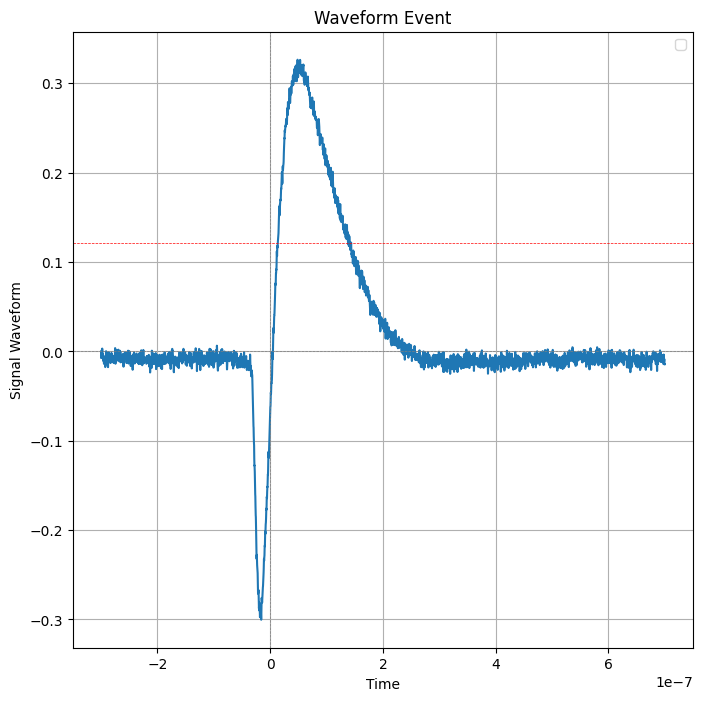

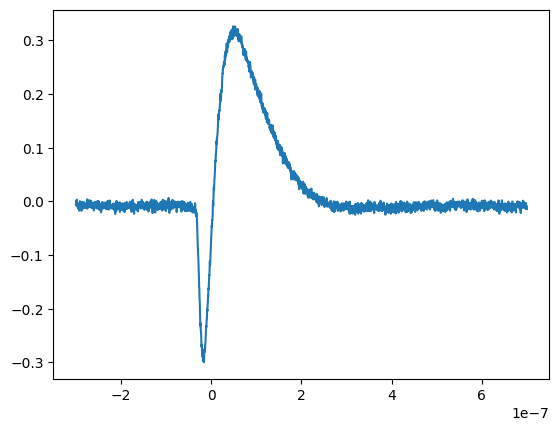

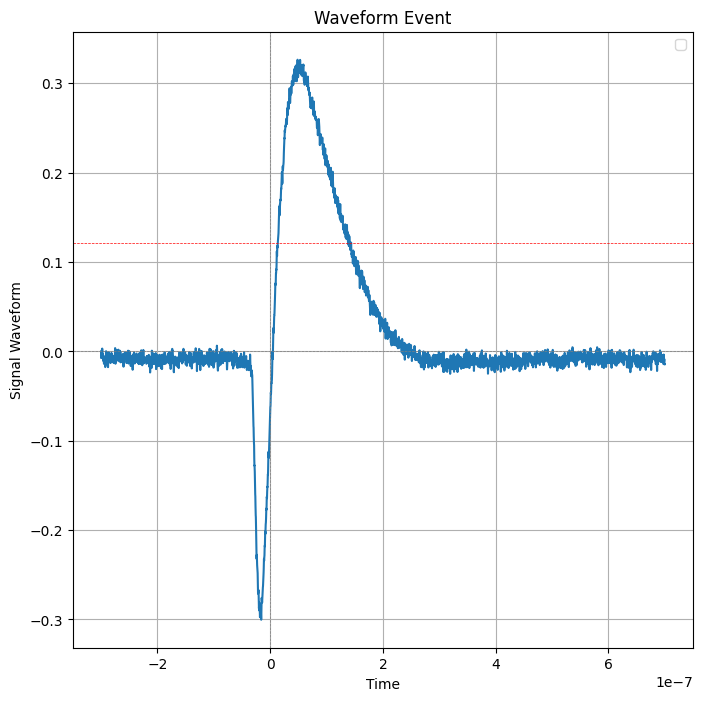

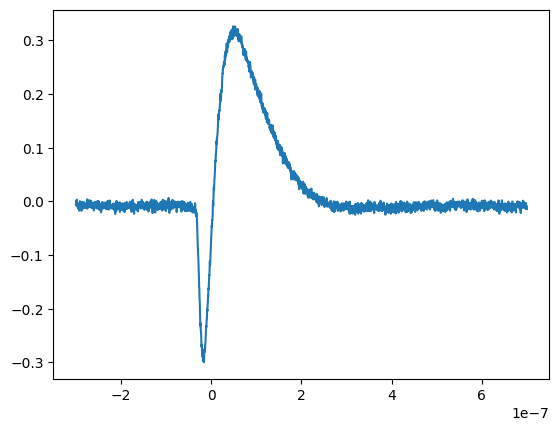

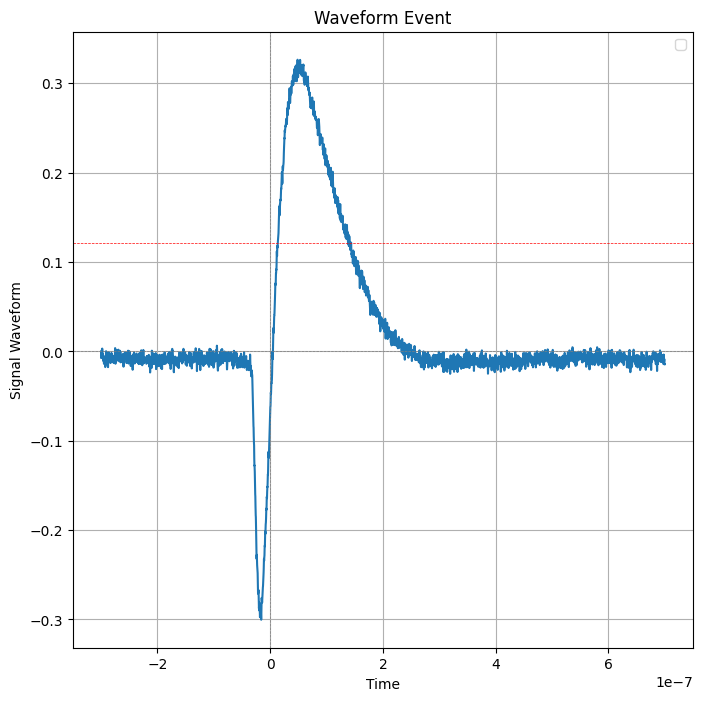

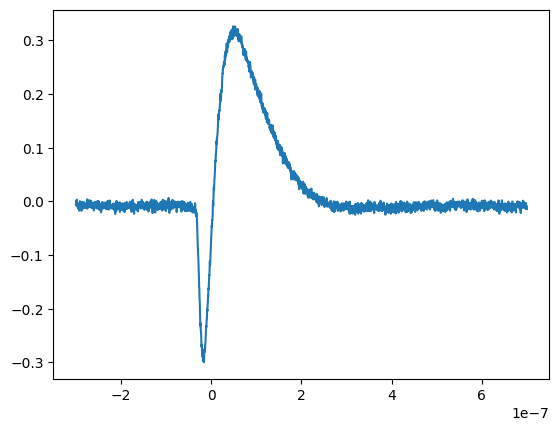

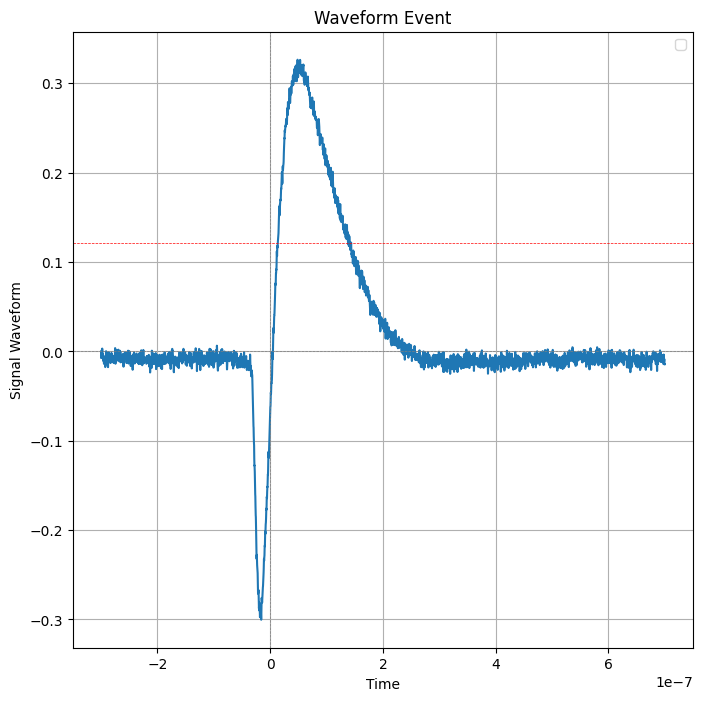

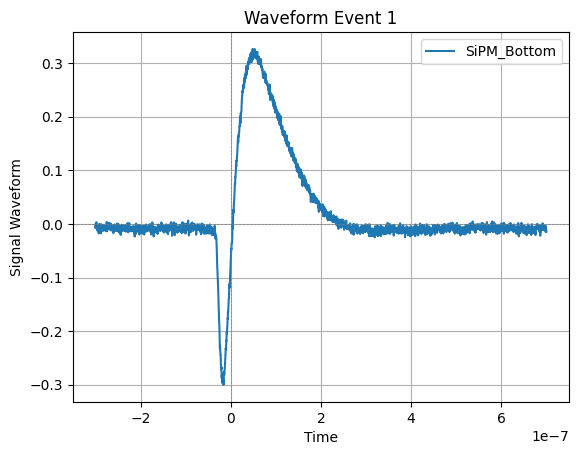

Event 1: S_Top: 3.262e-08, S_Bottom: 3.262e-08, S_Left: 3.262e-08, S_Right: 3.262e-08 -> X_CoM: 0.0, Y_CoM: 0.0


<Figure size 800x800 with 0 Axes>

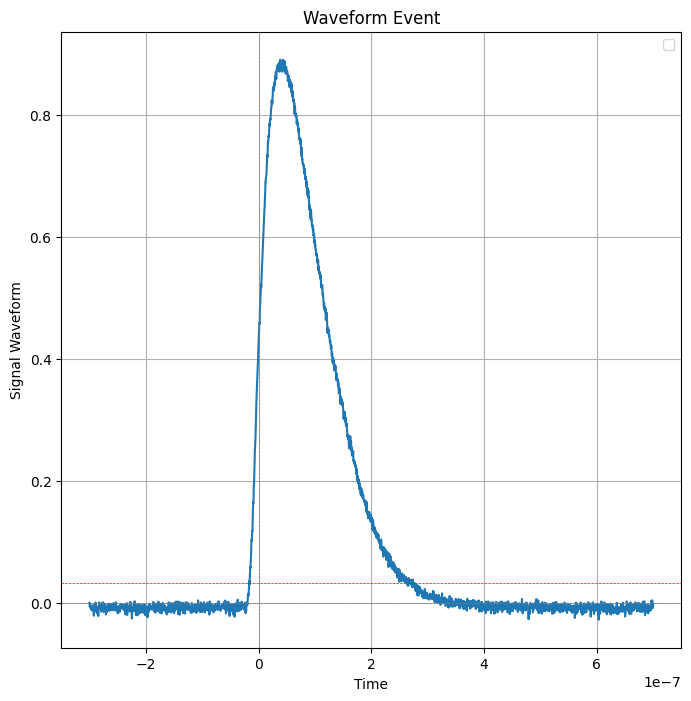

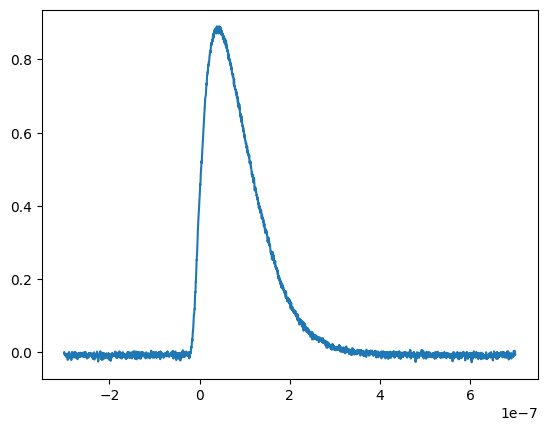

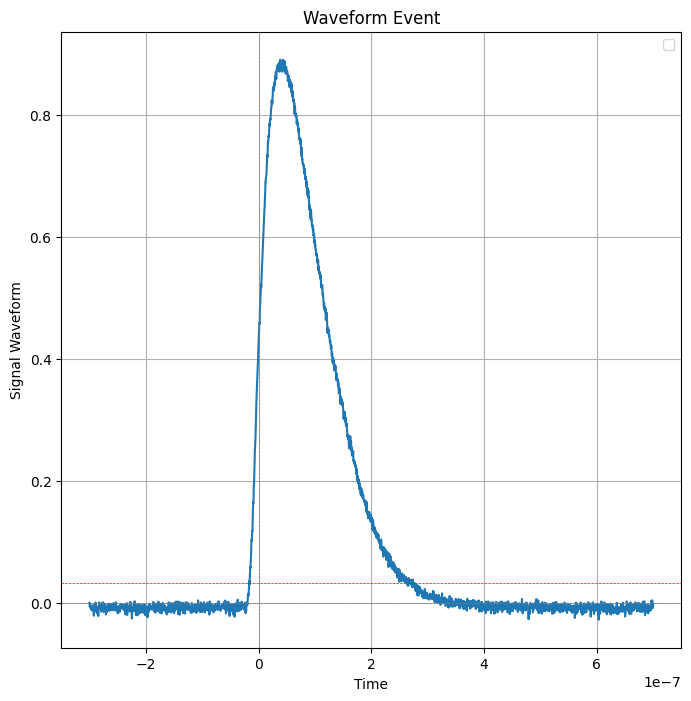

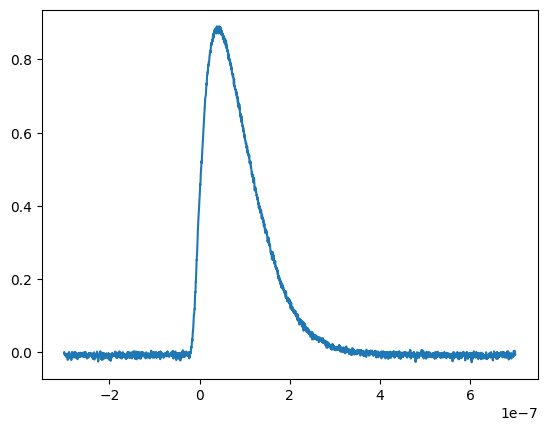

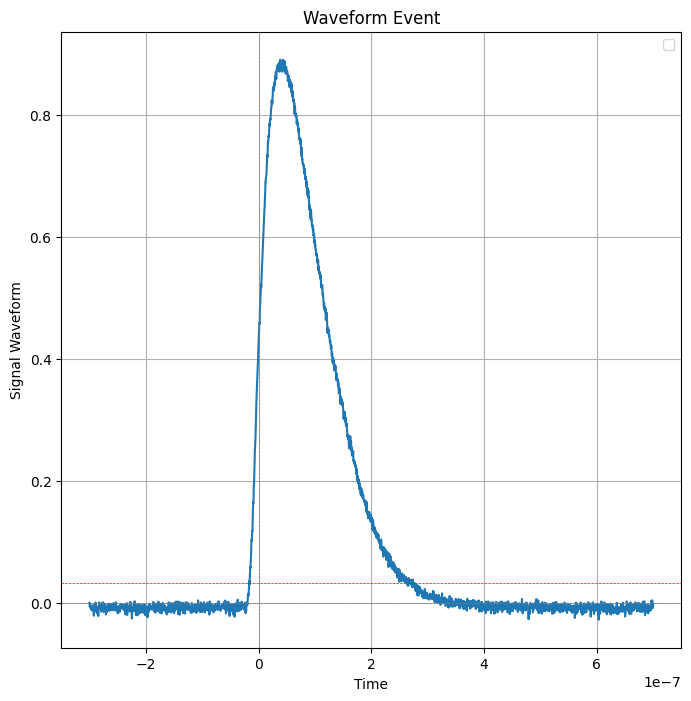

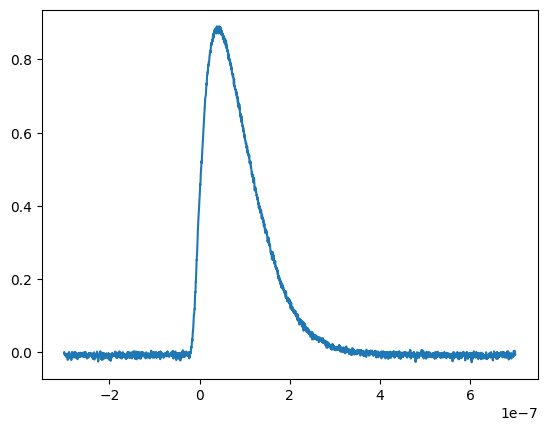

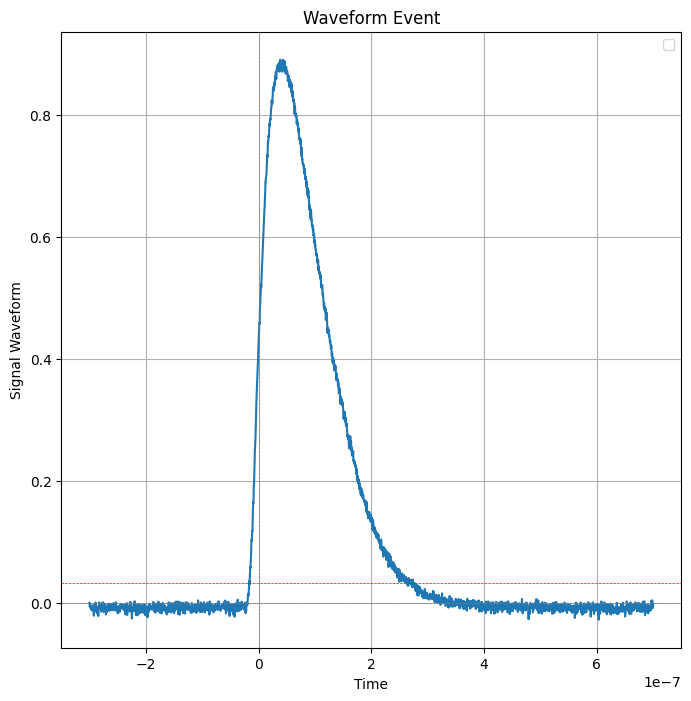

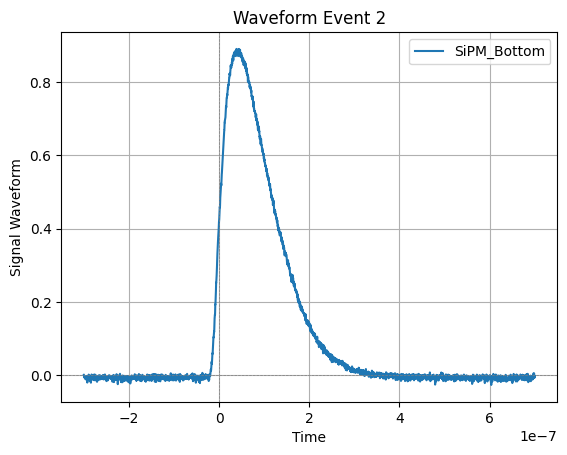

Event 2: S_Top: 1.182e-07, S_Bottom: 1.182e-07, S_Left: 1.182e-07, S_Right: 1.182e-07 -> X_CoM: 0.0, Y_CoM: 0.0


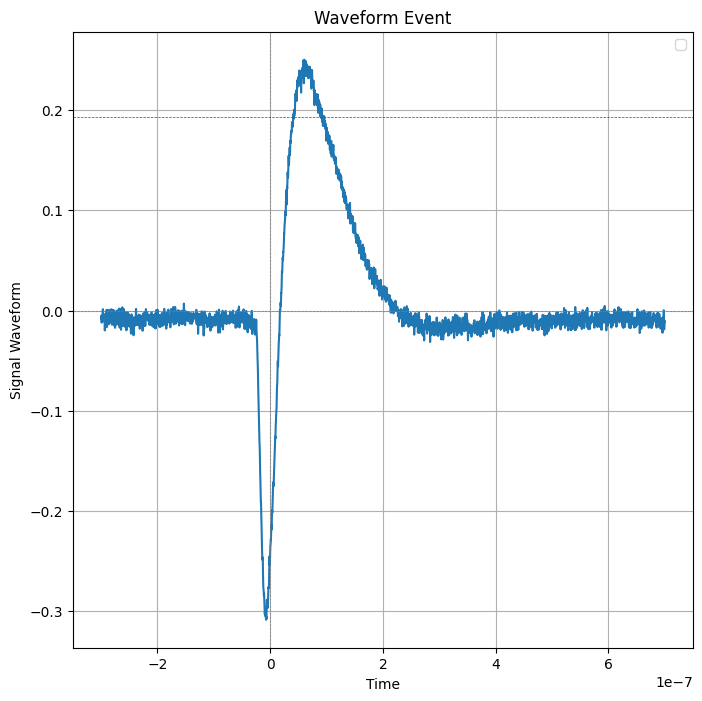

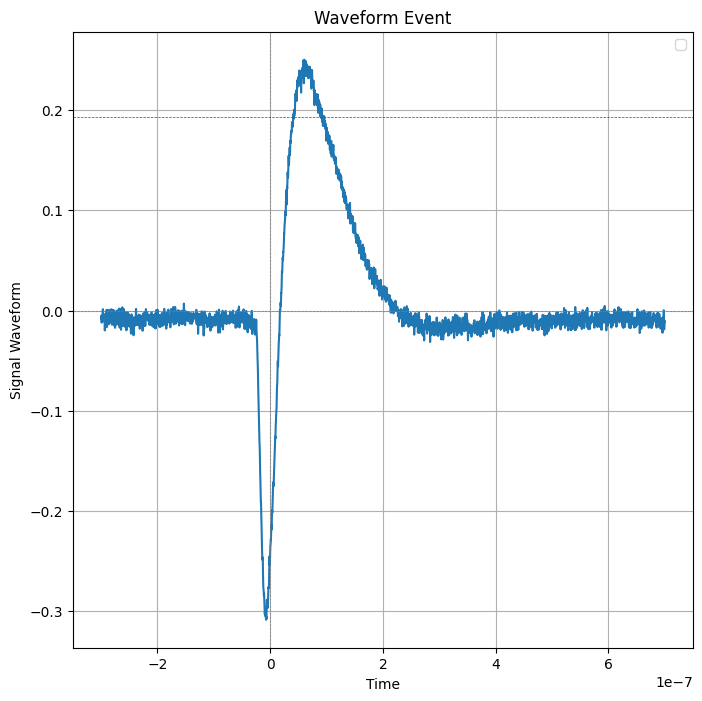

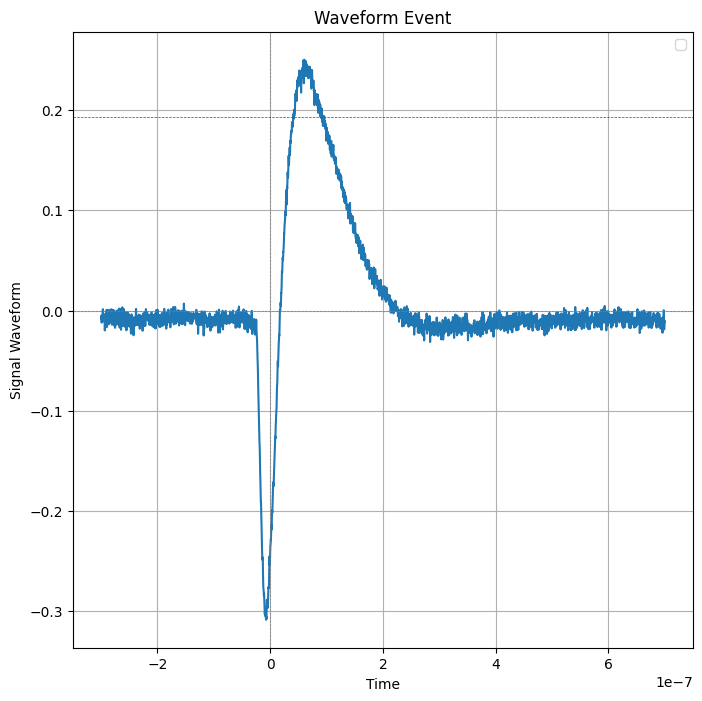

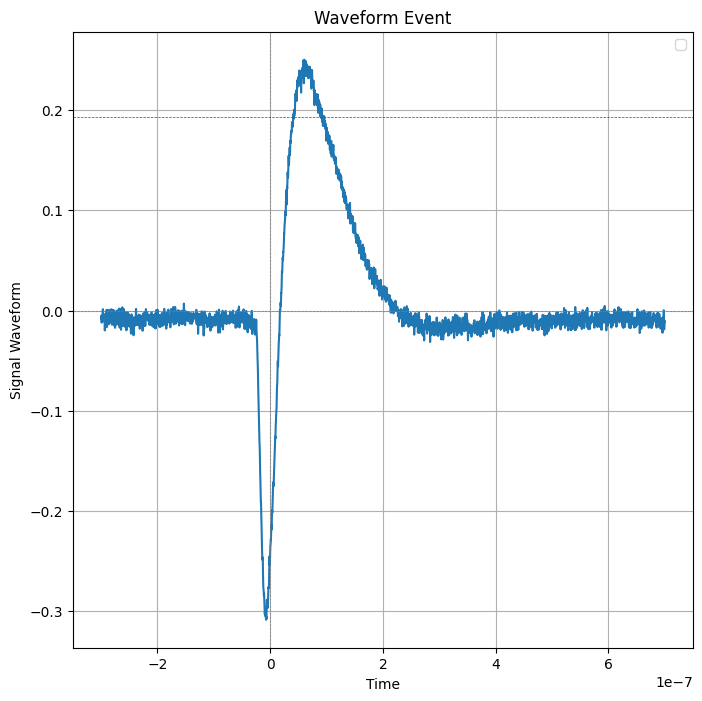

Event 3: S_Top: 8.097e-09, S_Bottom: 8.097e-09, S_Left: 8.097e-09, S_Right: 8.097e-09 -> X_CoM: 0.0, Y_CoM: 0.0


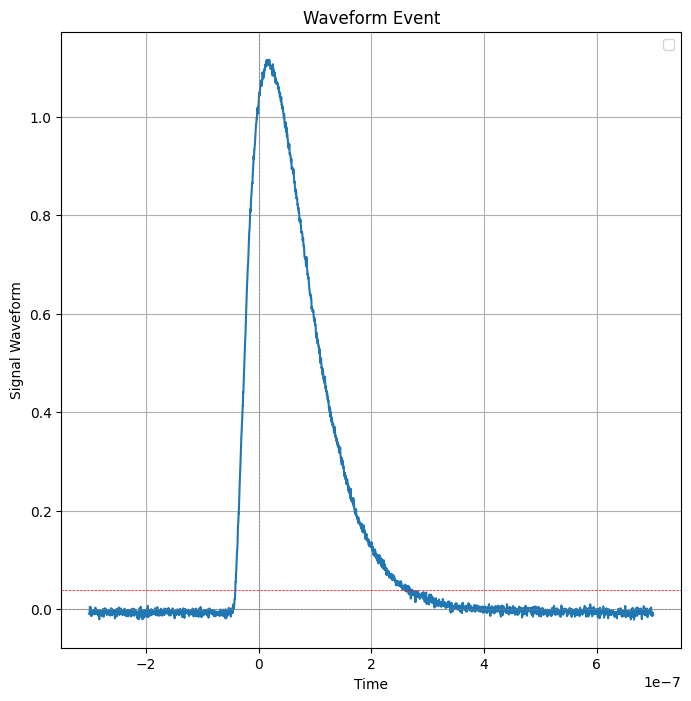

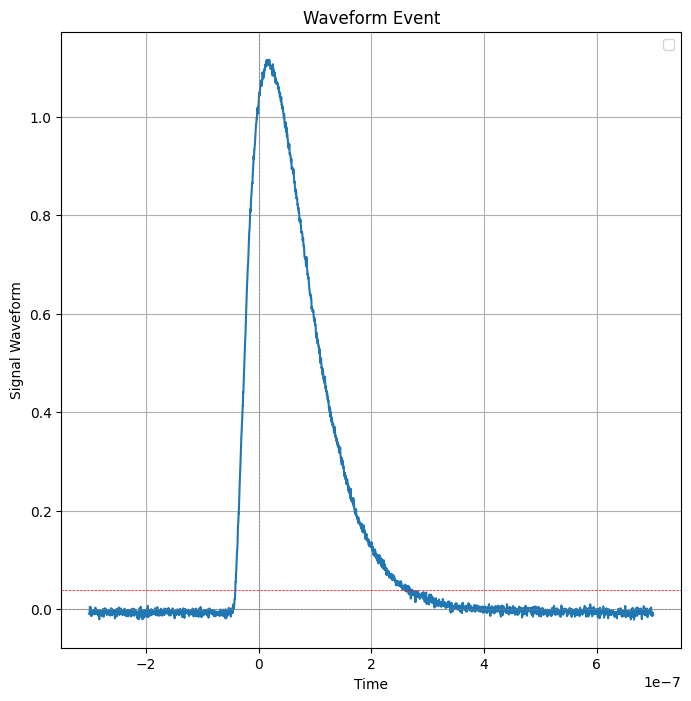

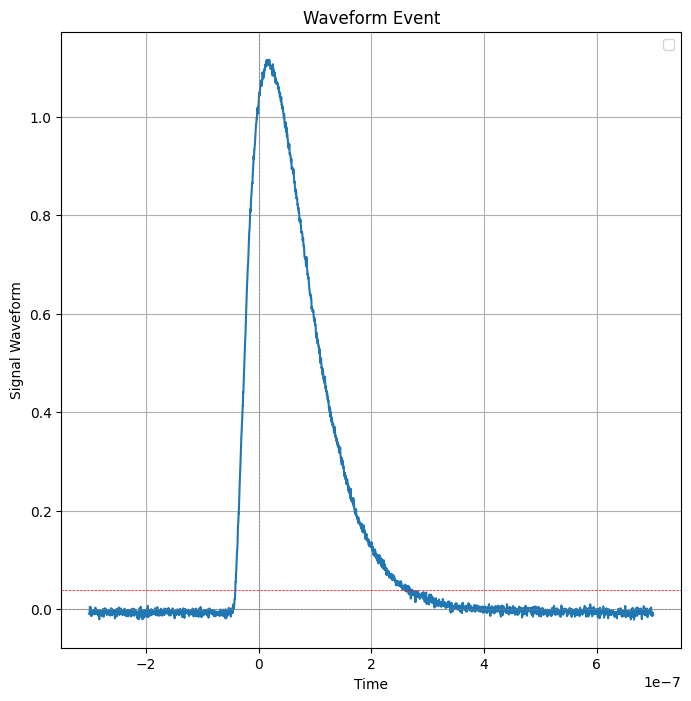

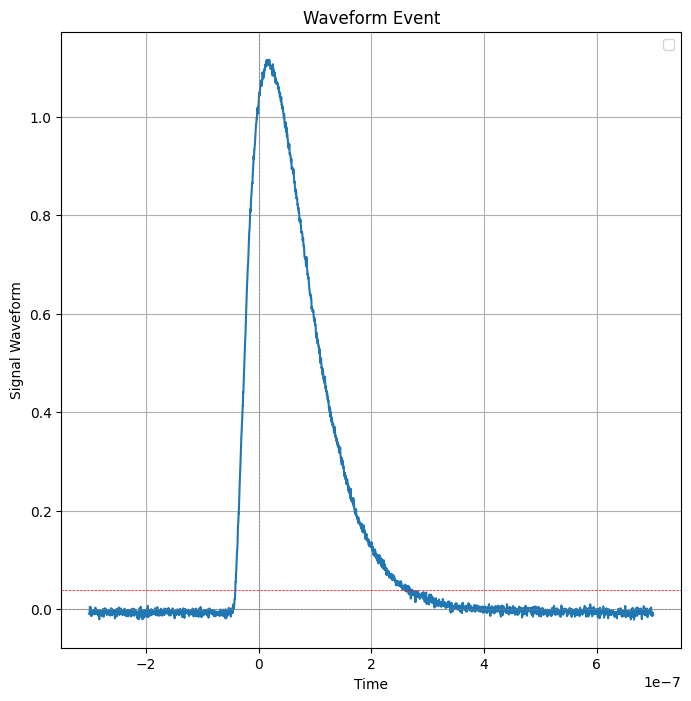

Event 4: S_Top: 1.529e-07, S_Bottom: 1.529e-07, S_Left: 1.529e-07, S_Right: 1.529e-07 -> X_CoM: 0.0, Y_CoM: 0.0


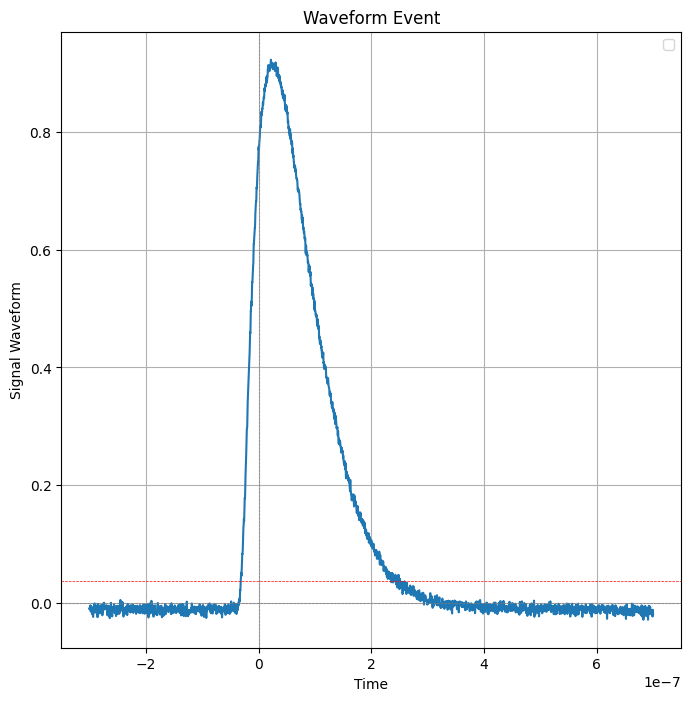

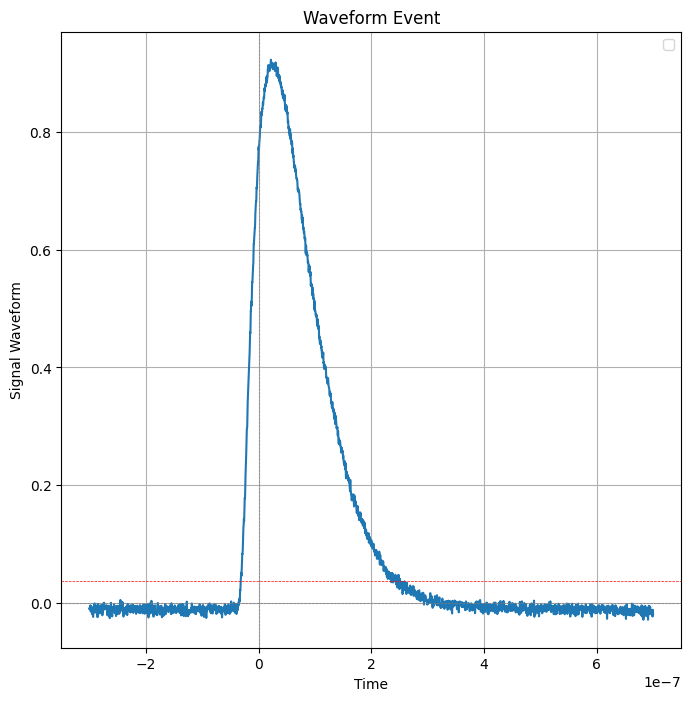

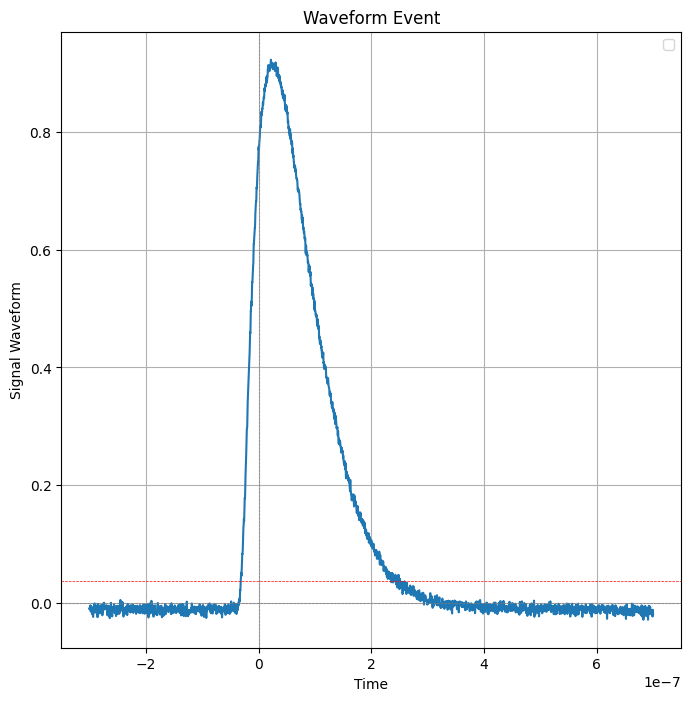

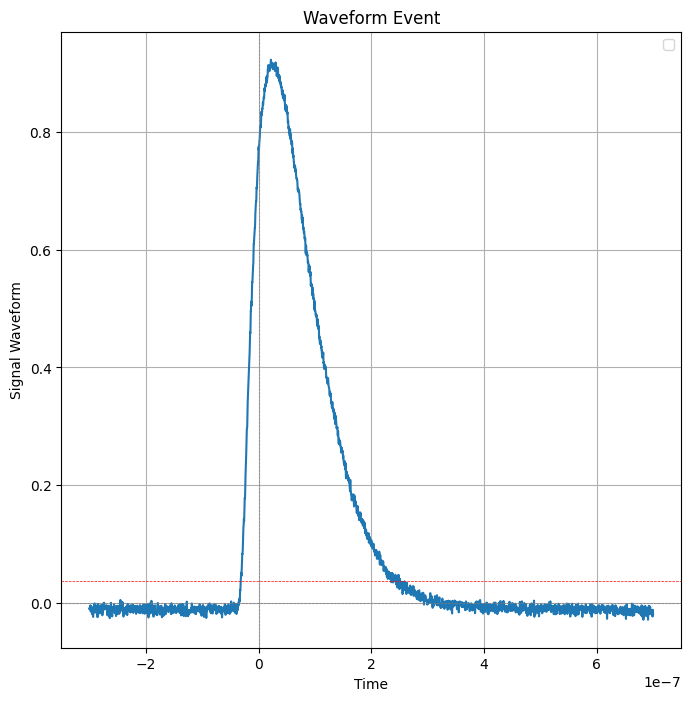

Event 5: S_Top: 1.216e-07, S_Bottom: 1.216e-07, S_Left: 1.216e-07, S_Right: 1.216e-07 -> X_CoM: 0.0, Y_CoM: 0.0


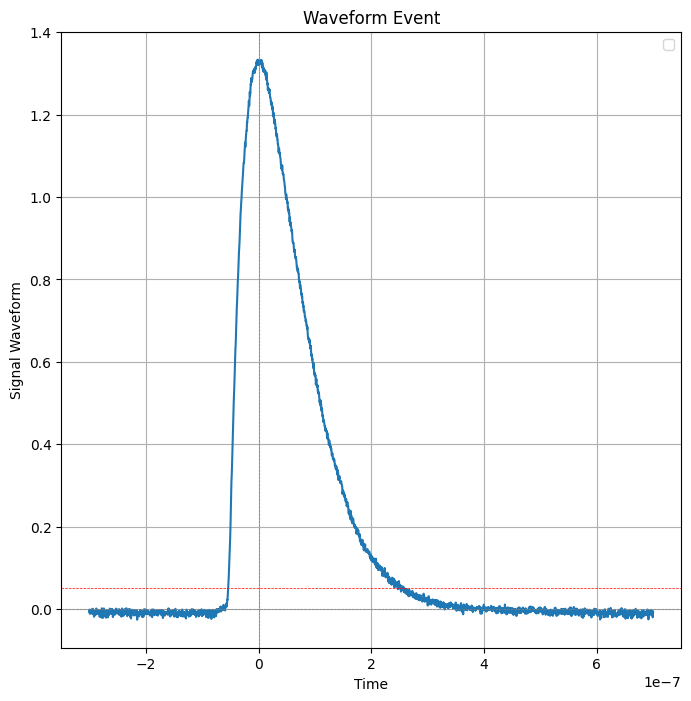

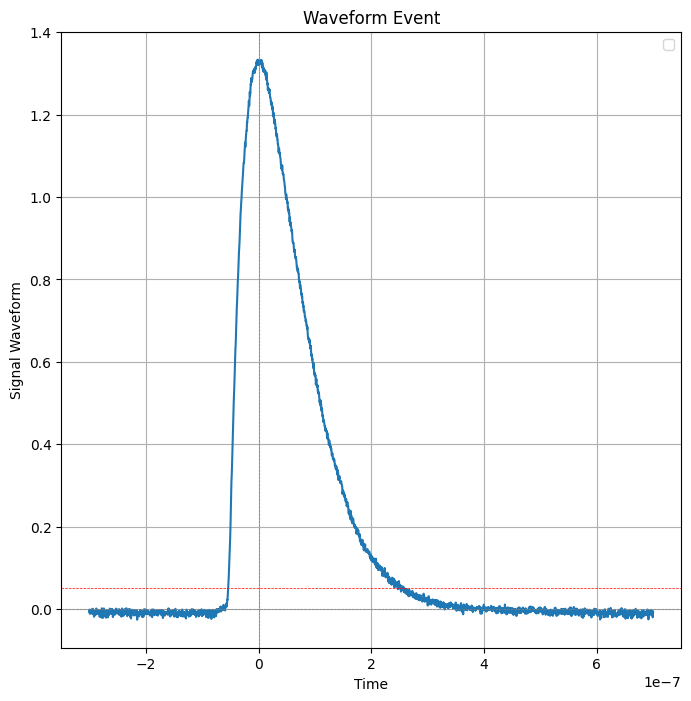

KeyboardInterrupt: 

In [17]:
reconstructed_coords = []

channel_dfs = {
    ch: df_traces.loc[df_traces['channel'] == ch, ['y_values', 'x_values']].reset_index(drop=True)
    for ch in channel_map.keys()
}

print(channel_dfs)
for i in channel_dfs:
    print(f"Length of channel_dfs: {len(channel_dfs[i])}")

n_events = len(channel_dfs['C1']) 

print(n_events)

limit = 3 # How many plots we want


for event_idx in range(n_events):
    event_signals = {}

    if event_idx < limit:
        plt.figure(figsize=(8, 8))
    for ch_name, sipm_name in channel_map.items():
        v = channel_dfs[ch_name].loc[event_idx, 'y_values']
        t = channel_dfs[ch_name].loc[event_idx, 'x_values']

        event_signals[sipm_name] = process_single_sweep(v, t)
        if event_idx < limit:
            plt.plot(t, v, label=sipm_name)

    if event_idx < limit:
        plt.xlabel("Time")
        plt.ylabel("Signal Waveform")
        plt.title(f"Waveform Event {event_idx}")
        plt.grid(True)
        plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
        plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
        plt.legend()
        plt.show()

    #print(f"Event signals atm: {channel_dfs} ----- end")

    S_Top    = event_signals['SiPM_Top']
    S_Bottom = event_signals['SiPM_Bottom']
    S_Left   = event_signals['SiPM_Left']
    S_Right  = event_signals['SiPM_Right']

    """
    # Calculate X and Y Center of Mass  <-- differential center-of-mass method (using General Centroid Formula)
    x_com, y_com = None, None
    den_x = S_Right + S_Left
    if den_x > 0:
        x_com = K_X * (S_Right - S_Left) / den_x
    
    den_y = S_Top + S_Bottom
    if den_y > 0:
        y_com = K_Y * (S_Top - S_Bottom) / den_y"""


    sum_of_amps = S_Top + S_Bottom + S_Right + S_Left

    if sum_of_amps > 0:

        top_weight = S_Top/sum_of_amps
        bottom_weight = S_Bottom/sum_of_amps
        left_weigth = S_Left/sum_of_amps
        right_weight = S_Right/sum_of_amps

        x_com = top_weight * sipm_positions['SiPM_Top'][0] + bottom_weight * sipm_positions['SiPM_Bottom'][0] + left_weigth * sipm_positions['SiPM_Left'][0] + right_weight * sipm_positions['SiPM_Right'][0]
        y_com = top_weight * sipm_positions['SiPM_Top'][1] + bottom_weight * sipm_positions['SiPM_Bottom'][1] + left_weigth * sipm_positions['SiPM_Left'][1] + right_weight * sipm_positions['SiPM_Right'][1]

    #if x_com != None and y_com == 5.0:
    #    reconstructed_coords.append((x_com, y_com))
    plot_dir = "sipm_sweep_plots"
    os.makedirs(plot_dir, exist_ok=True)
    if x_com is not None and y_com != None:
        reconstructed_coords.append((x_com, y_com))

    if event_idx < 100:
        #x_com_str = f"{x_com:.2f}"
        #y_com_str = f"{y_com:.2f}"
        x_com_str = f"{x_com}"
        y_com_str = f"{y_com}"
        print(f"Event {event_idx}: S_Top: {S_Top:.3e}, S_Bottom: {S_Bottom:.3e}, S_Left: {S_Left:.3e}, S_Right: {S_Right:.3e} -> X_CoM: {x_com_str}, Y_CoM: {y_com_str}")


print(f"\nReconstruction complete for {len(reconstructed_coords)} events.")

5000
[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


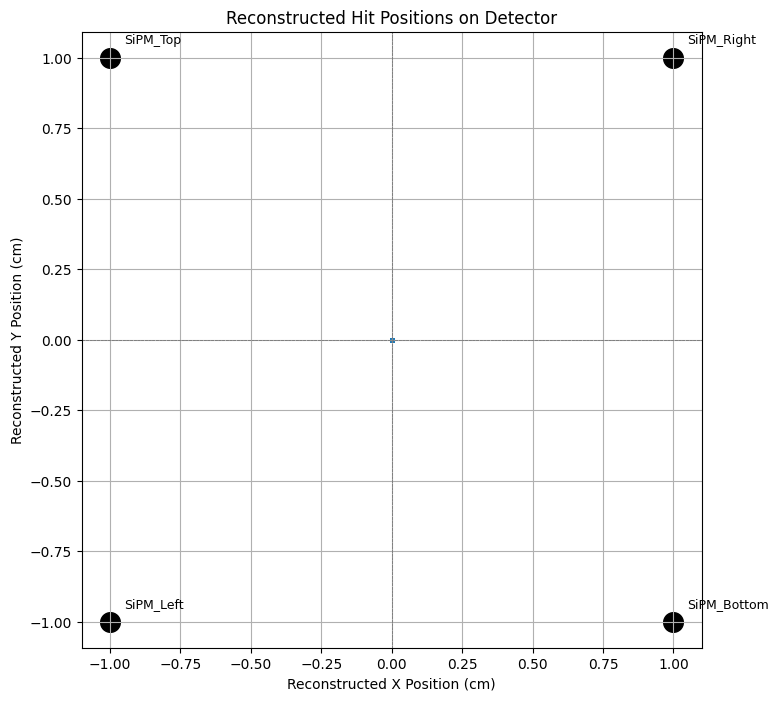

In [ ]:
x_coords = [coord[0] for coord in reconstructed_coords if coord[0] is not None]
y_coords = [coord[1] for coord in reconstructed_coords if coord[1] is not None]

print(len(x_coords))
print(x_coords)
print(len(y_coords))
print(y_coords)

if x_coords and y_coords:
    plt.figure(figsize=(8, 8))
    plt.scatter(x_coords, y_coords, s=5, alpha=0.6, label='Reconstructed Hits')

    # Overlay SiPM positions for reference
    for sipm_name, (x, y) in sipm_positions.items():
        plt.scatter(x, y, color='black', marker='o', s=200, label=f'{sipm_name}' if 'SiPM' in sipm_name else None)
        plt.text(x+0.05, y+0.05, sipm_name, fontsize=9, color='black')

        plt.xlabel("Reconstructed X Position (cm)")
        plt.ylabel("Reconstructed Y Position (cm)")
        plt.title("Reconstructed Hit Positions on Detector")
        plt.grid(True)
        plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
        plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
        plt.axis('equal')
        plt.xlim([-K_X * 1.1, K_X * 1.1])
        plt.ylim([-K_Y * 1.1, K_Y * 1.1])
        plt.savefig("reconstructed_hits1.png")

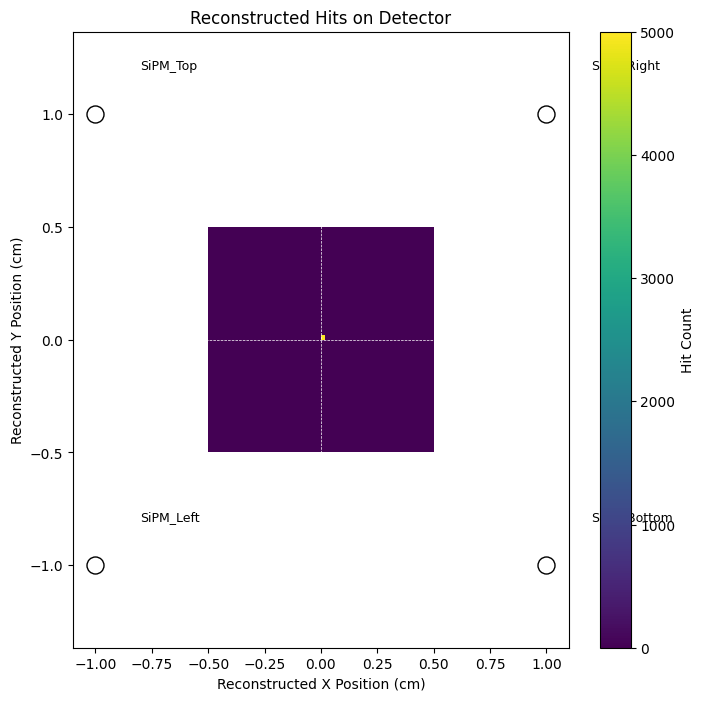

In [ ]:
# Heatmap
plt.figure(figsize=(8, 8))
plt.hist2d(x_coords, y_coords, bins=50, cmap='viridis')
plt.colorbar(label="Hit Count")

for sipm_name, (x, y) in sipm_positions.items():
    plt.scatter(x, y, color='white', edgecolors='black', marker='o', s=150)
    plt.text(x + 0.2, y + 0.2, sipm_name, fontsize=9, color='black')

plt.xlabel("Reconstructed X Position (cm)")
plt.ylabel("Reconstructed Y Position (cm)")
plt.title("Reconstructed Hits on Detector")
plt.axhline(0, color='white', linestyle='--', linewidth=0.5)
plt.axvline(0, color='white', linestyle='--', linewidth=0.5)
plt.axis('equal')
plt.savefig("reconstructed_hits_hitmap.png", dpi=300)
plt.show()